In [1]:
import xarray as xr
import metpy.plots
%pylab inline

/homes/rjackson/anaconda3/envs/py38/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


Populating the interactive namespace from numpy and matplotlib


In [2]:
classification_ds = xr.open_dataset('Clusters.nc')

/homes/rjackson/anaconda3/envs/py38/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


(array([5340.,    0., 5772.,    0., 5089.,    0., 5438.,    0., 1086.,
        1405.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

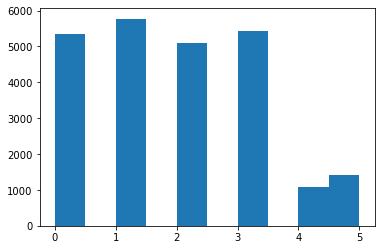

In [3]:
plt.hist(classification_ds.classification.values)

/tmp/ipykernel_1387277/2373145266.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hour_hists[i, :] = np.histogram(hour[classification == i], bins=time_bins, normed=True)[0]


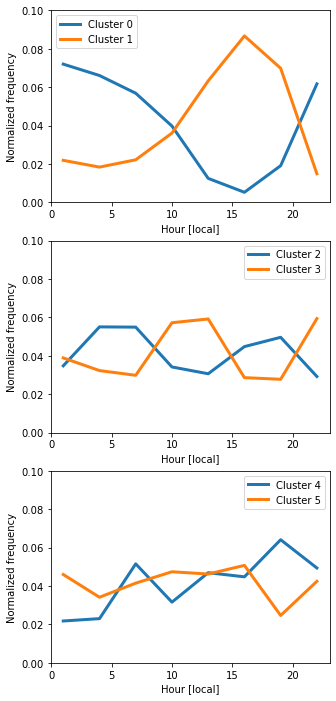

In [8]:
classification = classification_ds.classification.values
hour = classification_ds.time.dt.hour.values - 5
hour[hour < 0] += 24
time_bins = np.arange(0., 25., 3.)
hour_hists = np.zeros((6, 8))
for i in range(6):
    hour_hists[i, :] = np.histogram(hour[classification == i], bins=time_bins, normed=True)[0]

fig, ax = plt.subplots(3, 1, figsize=(5, 12))
for i in range(2):
    ax[0].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % i, linewidth=3)
ax[0].legend()
ax[0].set_ylim([0, 0.1])
ax[0].set_xlabel('Hour [local]')
ax[0].set_ylabel('Normalized frequency')

for i in range(2,4):
    ax[1].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % i, linewidth=3)
ax[1].legend()
ax[1].set_ylim([0, 0.1])
ax[1].set_xlabel('Hour [local]')
ax[1].set_ylabel('Normalized frequency')

for i in range(4,6):
    ax[2].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % i, linewidth=3)
ax[2].legend()
ax[2].set_ylim([0, 0.1])
ax[2].set_xlabel('Hour [local]')
ax[2].set_ylabel('Normalized frequency')

fig.savefig('Time_periods.png', dpi=300)

In [3]:
soundings_ds = xr.open_mfdataset('/lambda_stor/data/rjackson/sgpsonde/*.cdf')

In [4]:
soundings_ds

<xarray.Dataset>
Dimensions:      (time: 2144545)
Coordinates:
  * time         (time) datetime64[ns] 2017-06-29T23:32:00 ... 2017-10-02T01:...
Data variables: (12/25)
    base_time    (time) datetime64[ns] 2017-06-29 2017-06-29 ... 2017-10-01
    time_offset  (time) datetime64[ns] dask.array<chunksize=(5435,), meta=np.ndarray>
    qc_time      (time) int32 dask.array<chunksize=(5435,), meta=np.ndarray>
    pres         (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    qc_pres      (time) int32 dask.array<chunksize=(5435,), meta=np.ndarray>
    tdry         (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    ...           ...
    wstat        (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    asc          (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    qc_asc       (time) int32 dask.array<chunksize=(5435,), meta=np.ndarray>
    lat          (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    lon          (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
    alt          (time) float32 dask.array<chunksize=(5435,), meta=np.ndarray>
Attributes: (12/39)
    command_line:               sonde_ingest -s sgp -f C1
    process_version:            ingest-sonde-10.12-0.el6
    ingest_software:            ingest-sonde-10.12-0.el6
    dod_version:                sondewnpn-b1-2.1
    site_id:                    sgp
    facility_id:                C1: Lamont, Oklahoma
    ...                         ...
    qc_bit_3_description:       Value is greater than the valid_max.
    qc_bit_3_assessment:        Bad
    qc_bit_4_description:       Difference between current and previous value...
    qc_bit_4_assessment:        Indeterminate
    zeb_platform:               sgpsondewnpnC1.b1
    history:                    created by user dsmgr on machine ruby at 2017...

In [23]:
classification_ds = classification_ds.reindex(time=soundings_ds.time, method='nearest', tolerance=1e9*3600*6)

In [37]:
classification_ds.load()
soundings_ds.load()

<xarray.Dataset>
Dimensions:      (time: 2144545)
Coordinates:
  * time         (time) datetime64[ns] 2017-06-29T23:32:00 ... 2017-10-02T01:...
Data variables: (12/25)
    base_time    (time) datetime64[ns] 2017-06-29 2017-06-29 ... 2017-10-01
    time_offset  (time) datetime64[ns] 2017-06-29T23:32:00 ... 2017-10-02T01:...
    qc_time      (time) int32 0 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2
    pres         (time) float32 969.2 968.4 967.6 967.0 ... 17.85 17.84 17.82
    qc_pres      (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    tdry         (time) float32 34.3 33.46 33.29 33.11 ... -49.36 -49.37 -49.37
    ...           ...
    wstat        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    asc          (time) float32 0.0 7.3 6.8 6.1 5.8 6.0 ... 6.0 5.5 5.0 5.0 4.8
    qc_asc       (time) int32 0 8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    lat          (time) float32 36.61 36.61 36.61 36.61 ... 37.02 37.02 37.02
    lon          (time) float32 -97.49 -97.49 -97.49 ... -96.66 -96.66 -96.66
    alt          (time) float32 314.8 322.2 329.0 ... 2.734e+04 2.735e+04
Attributes: (12/39)
    command_line:               sonde_ingest -s sgp -f C1
    process_version:            ingest-sonde-10.12-0.el6
    ingest_software:            ingest-sonde-10.12-0.el6
    dod_version:                sondewnpn-b1-2.1
    site_id:                    sgp
    facility_id:                C1: Lamont, Oklahoma
    ...                         ...
    qc_bit_3_description:       Value is greater than the valid_max.
    qc_bit_3_assessment:        Bad
    qc_bit_4_description:       Difference between current and previous value...
    qc_bit_4_assessment:        Indeterminate
    zeb_platform:               sgpsondewnpnC1.b1
    history:                    created by user dsmgr on machine ruby at 2017...

In [64]:
height_bins = np.linspace(1000., 100., 100)
pres = np.zeros((6, len(height_bins)-1))
u_wind = np.zeros((6, len(height_bins)-1))
v_wind = np.zeros((6, len(height_bins)-1))
dp = np.zeros((6, len(height_bins)-1))
tdry = np.zeros((6, len(height_bins)-1))
for i in range(6):
    for j in range(len(height_bins) - 1):
        the_inds = np.logical_and.reduce((classification_ds.classification.values == i, soundings_ds.pres.values <= height_bins[j],
                                          soundings_ds.pres.values >= height_bins[j + 1]))
        u_wind[i, j] = np.nanmean(soundings_ds.u_wind.values[the_inds])
        v_wind[i, j] = np.nanmean(soundings_ds.v_wind.values[the_inds])
        dp[i, j] = np.nanmean(soundings_ds.dp.values[the_inds])
        tdry[i, j] = np.nanmean(soundings_ds.tdry.values[the_inds])

/tmp/ipykernel_2907900/2749875677.py:11: RuntimeWarning: Mean of empty slice
  u_wind[i, j] = np.nanmean(soundings_ds.u_wind.values[the_inds])
/tmp/ipykernel_2907900/2749875677.py:12: RuntimeWarning: Mean of empty slice
  v_wind[i, j] = np.nanmean(soundings_ds.v_wind.values[the_inds])
/tmp/ipykernel_2907900/2749875677.py:13: RuntimeWarning: Mean of empty slice
  dp[i, j] = np.nanmean(soundings_ds.dp.values[the_inds])
/tmp/ipykernel_2907900/2749875677.py:14: RuntimeWarning: Mean of empty slice
  tdry[i, j] = np.nanmean(soundings_ds.tdry.values[the_inds])


/homes/rjackson/anaconda3/envs/py38/lib/python3.8/site-packages/metpy/plots/skewt.py:316: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = fig.add_subplot(*subplot, projection='skewx', rotation=rotation)
/homes/rjackson/anaconda3/envs/py38/lib/python3.8/site-packages/metpy/plots/skewt.py:316: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = fig.add_subplot(*subplot, projection='skewx', rotation=rotation)
/homes/rjackson/anaconda3/envs/py38/lib/python3.8/site-packages/metpy/plots/skewt.py:316: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = fig.add_subplot(*subplot, projection='skewx', rotation=rotation)
/homes/rjackson/

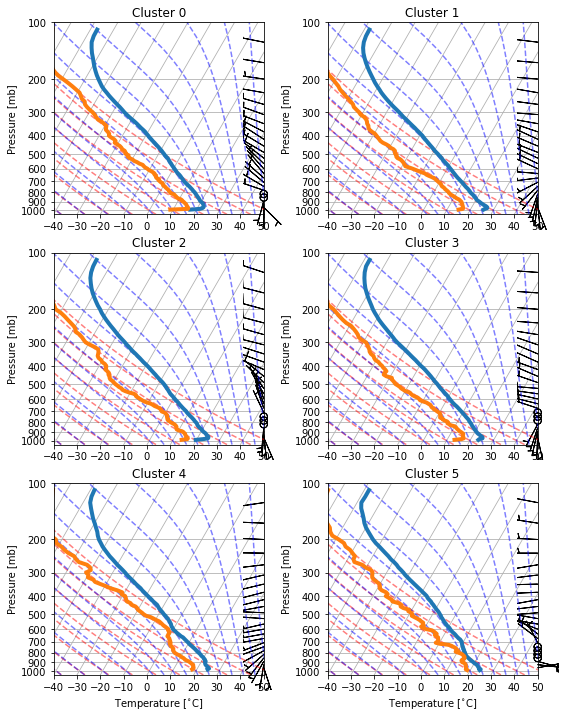

In [92]:
fig = plt.figure(figsize=(9, 12))
skewT = metpy.plots.SkewT(fig=fig, subplot='321')
skewT.plot(height_bins[:-1], tdry[0], linewidth=4)
skewT.plot(height_bins[:-1], dp[0], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[0][::4], v_wind[0][::4])
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT.ax.set_title('Cluster 0')
skewT.ax.set_ylabel('Pressure [mb]')
#skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')  
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT = metpy.plots.SkewT(fig=fig, subplot='322')
skewT.plot(height_bins[:-1], tdry[1], linewidth=4)
skewT.plot(height_bins[:-1], dp[1], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[1][::4], v_wind[1][::4])
skewT.ax.set_title('Cluster 1')
skewT.ax.set_ylabel('Pressure [mb]')
#skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT = metpy.plots.SkewT(fig=fig, subplot='323')
skewT.plot(height_bins[:-1], tdry[2], linewidth=4)
skewT.plot(height_bins[:-1], dp[2], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[2][::4], v_wind[2][::4])
skewT.ax.set_title('Cluster 2')
skewT.ax.set_ylabel('Pressure [mb]')
#skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')  
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT = metpy.plots.SkewT(fig=fig, subplot='324')
skewT.plot(height_bins[:-1], tdry[3], linewidth=4)
skewT.plot(height_bins[:-1], dp[3], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[3][::4], v_wind[3][::4])
skewT.ax.set_title('Cluster 3')
skewT.ax.set_ylabel('Pressure [mb]')
#skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')  
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT = metpy.plots.SkewT(fig=fig, subplot='325')
skewT.plot(height_bins[:-1], tdry[4], linewidth=4)
skewT.plot(height_bins[:-1], dp[4], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[4][::4], v_wind[4][::4])
skewT.ax.set_title('Cluster 4')
skewT.ax.set_ylabel('Pressure [mb]')
skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
skewT = metpy.plots.SkewT(fig=fig, subplot='326')
skewT.plot(height_bins[:-1], tdry[5], linewidth=4)
skewT.plot(height_bins[:-1], dp[5], linewidth=4)
skewT.plot_barbs(height_bins[:-1:4], u_wind[5][::4], v_wind[5][::4])
skewT.ax.set_title('Cluster 5')
skewT.ax.set_ylabel('Pressure [mb]')
skewT.ax.set_xlabel('Temperature [$^{\circ}$C]')   
skewT.plot_dry_adiabats()
skewT.plot_moist_adiabats()
fig.savefig('Sounding_clusters.png', dpi=300)

In [51]:
dp[3]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

'1.1.0'